## Visualization Case Study: World Life Expectancies

Gapminder is a foundation, based on Sweden, that aims to enhance basic awareness of basic facts about the socioeconomic global world. As part of their efforts, they collect detailed statistics on life expectancy, population, and GDP, sometimes going back over many years. 

In this case study, we'll look at an excerpt of the Gapminder data. This excerpt has been packaged up and made available via Jenny Bryan's [`gapminder` repo](https://github.com/jennybc/gapminder) on Github. 

Here's some familiar code to grab the data. 

In [2]:
import urllib
import pandas as pd
def retrieve_data(url):
    """
    Retrieve a file from the specified url and save it in a local file 
    called data.csv. 
    """
    
    # grab the data and parse it
    filedata = urllib.request.urlopen(url) 
    to_write = filedata.read()
    
    # write to file
    with open("data.csv", "wb") as f:
        f.write(to_write)
        
retrieve_data("https://philchodrow.github.io/PIC16A/datasets/gapminder.csv")
gapminder = pd.read_csv("data.csv")
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


We observe have six columns: the country, the continent on which the country is located, and the year of measurement. We then have three measured variables: life expectancy, population, and GDP per capita in the indicated year. 

Our goal is to understand visually the connection between life expectancy and GDP per capita. A good place to start is a simple scatter plot.

# Version 0

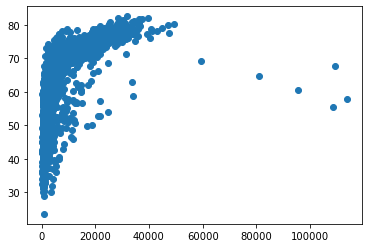

In [83]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1)
ax.scatter(gapminder["gdpPercap"], gapminder["lifeExp"])

# Version 1

[]

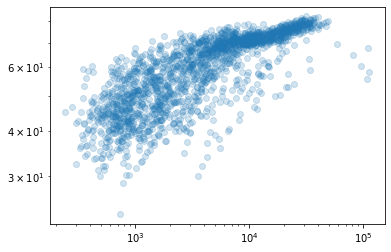

In [69]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1)
ax.scatter(gapminder["gdpPercap"], gapminder["lifeExp"], alpha = 0.2)
ax.loglog()

# Version 2

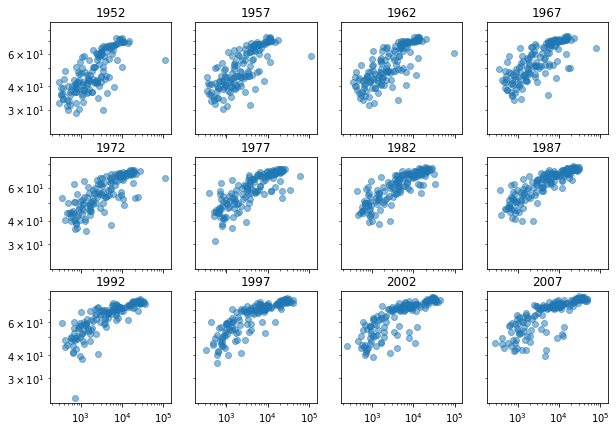

In [75]:
years = gapminder["year"].unique() # len(years) = 12

fig, ax = plt.subplots(3, 4, figsize = (10, 7), sharex = True, sharey = True)

for k in range(len(years)):
    year_data = gapminder[gapminder["year"] == years[k]]
    
    row = k // 4                             
    col = k  % 4
    
    ax[row, col].scatter(year_data["gdpPercap"], 
                         year_data["lifeExp"],
                         alpha = 0.5)
    
    ax[row, col].loglog()
    ax[row, col].set(title = years[k])

# Version 3

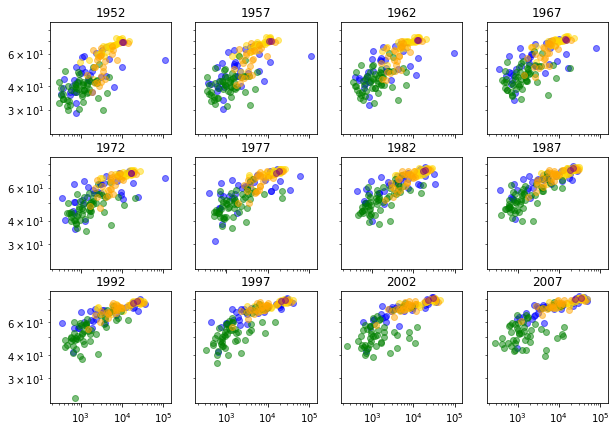

In [79]:
colors = {
    "Asia" : "Blue",
    "Europe" : "Gold",
    "Africa" : "Green",
    "Americas" : "Orange",
    "Oceania" : "Purple"
}

years = gapminder["year"].unique() # len(years) = 12
continents = gapminder["continent"].unique()

fig, ax = plt.subplots(3, 4, figsize = (10, 7), sharex = True, sharey = True)

for k in range(len(years)):
    year_data = gapminder[gapminder["year"] == years[k]]
    
    row = k // 4                             
    col = k  % 4
    
    for j in range(len(continents)): 
        continent_data = year_data[year_data["continent"] == continents[j]]
    
        ax[row, col].scatter(continent_data["gdpPercap"], 
                             continent_data["lifeExp"],
                             color = colors[continents[j]],
                             alpha = 0.5)
    
    ax[row, col].loglog()
    ax[row, col].set(title = years[k])

# Version 4

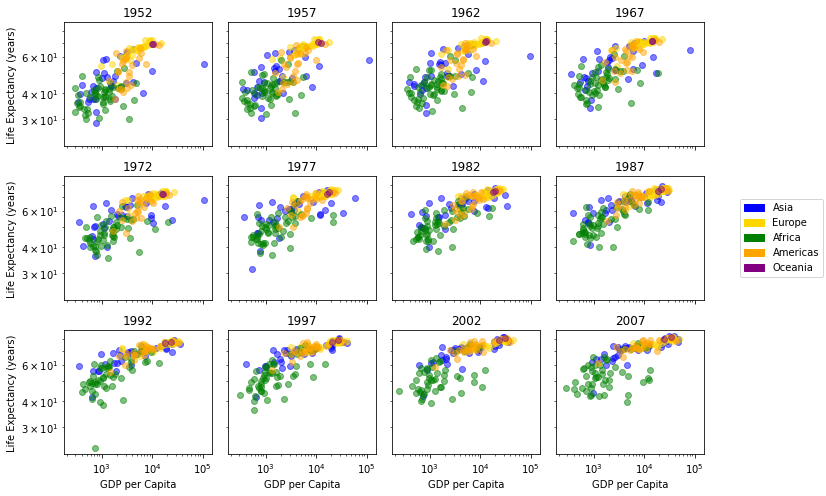

In [82]:
import matplotlib.patches as mpatches

colors = {
    "Asia" : "Blue",
    "Europe" : "Gold",
    "Africa" : "Green",
    "Americas" : "Orange",
    "Oceania" : "Purple"
}

years = gapminder["year"].unique() # len(years) = 12
continents = gapminder["continent"].unique()

fig, ax = plt.subplots(3, 4, figsize = (10, 7), sharex = True, sharey = True)

for k in range(len(years)):
    year_data = gapminder[gapminder["year"] == years[k]]
    
    row = k // 4                             
    col = k  % 4
    
    for j in range(len(continents)): 
        continent_data = year_data[year_data["continent"] == continents[j]]
    
        ax[row, col].scatter(continent_data["gdpPercap"], 
                             continent_data["lifeExp"],
                             color = colors[continents[j]],
                             alpha = 0.5)
    
    ax[row, col].loglog()
    ax[row, col].set(title = years[k])
    if row == 2:
        ax[row, col].set(xlabel = "GDP per Capita")
    if col == 0:
        ax[row, col].set(ylabel = "Life Expectancy (years)")

plt.tight_layout()
patches = [mpatches.Patch(color=colors[key], label=key) for key in colors]
fig.legend(handles=patches, bbox_to_anchor=(1.15, 0.6))